In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'
import numpy as np
# Import custom code
import csv
import pandas as pd
import scipy.cluster.hierarchy as hier
from sklearn import manifold

In [232]:
def draw_dendrogram(co_count, terms, color_thresh, fig_size=(10,50)):
    #Y = hier.linkage(norm_co_count(co_count),method='complete')
    Y = hier.linkage(co_count,method='complete')
    plt.figure(figsize=fig_size)
    Z = hier.dendrogram(Y,orientation='left',labels=terms, color_threshold=color_thresh, leaf_font_size=20)
    return Z

def sorted_counts(co_count):
    sort_ind = np.argsort(np.diag(np.array(co_count)))[::-1]    
    terms = [list(co_count)[idx] for idx in sort_ind]
    return np.array(co_count)[sort_ind][:,sort_ind], terms

def norm_co_count(co_count):
    #normalize co-occurrence matrix row-wise, i.e. divide each row
    # by that row's diagonal element
    normed = np.zeros(np.shape(co_count))
    for idx in range(np.shape(normed)[0]):
        if co_count[idx,idx] is not 0:
            normed[idx,:] = co_count[idx,:]/co_count[idx,idx]
        
    return normed

def jacard_dist(co_counts):
    # get jacardi index
    D = np.shape(co_counts)[0]
    X = co_counts
    jacardD = np.zeros((D,D))
    for i in range(D):
        for j in range(D):
            if X[i,j] != 0.:            
                jacardD[i,j] = X[i,j]/(X[i,i]+X[j,j]-X[i,j])

    return jacardD

### creating the dendrogram

(array([ 0. ,  0.5,  1. ,  1.5,  2. ]), <a list of 5 Text xticklabel objects>)

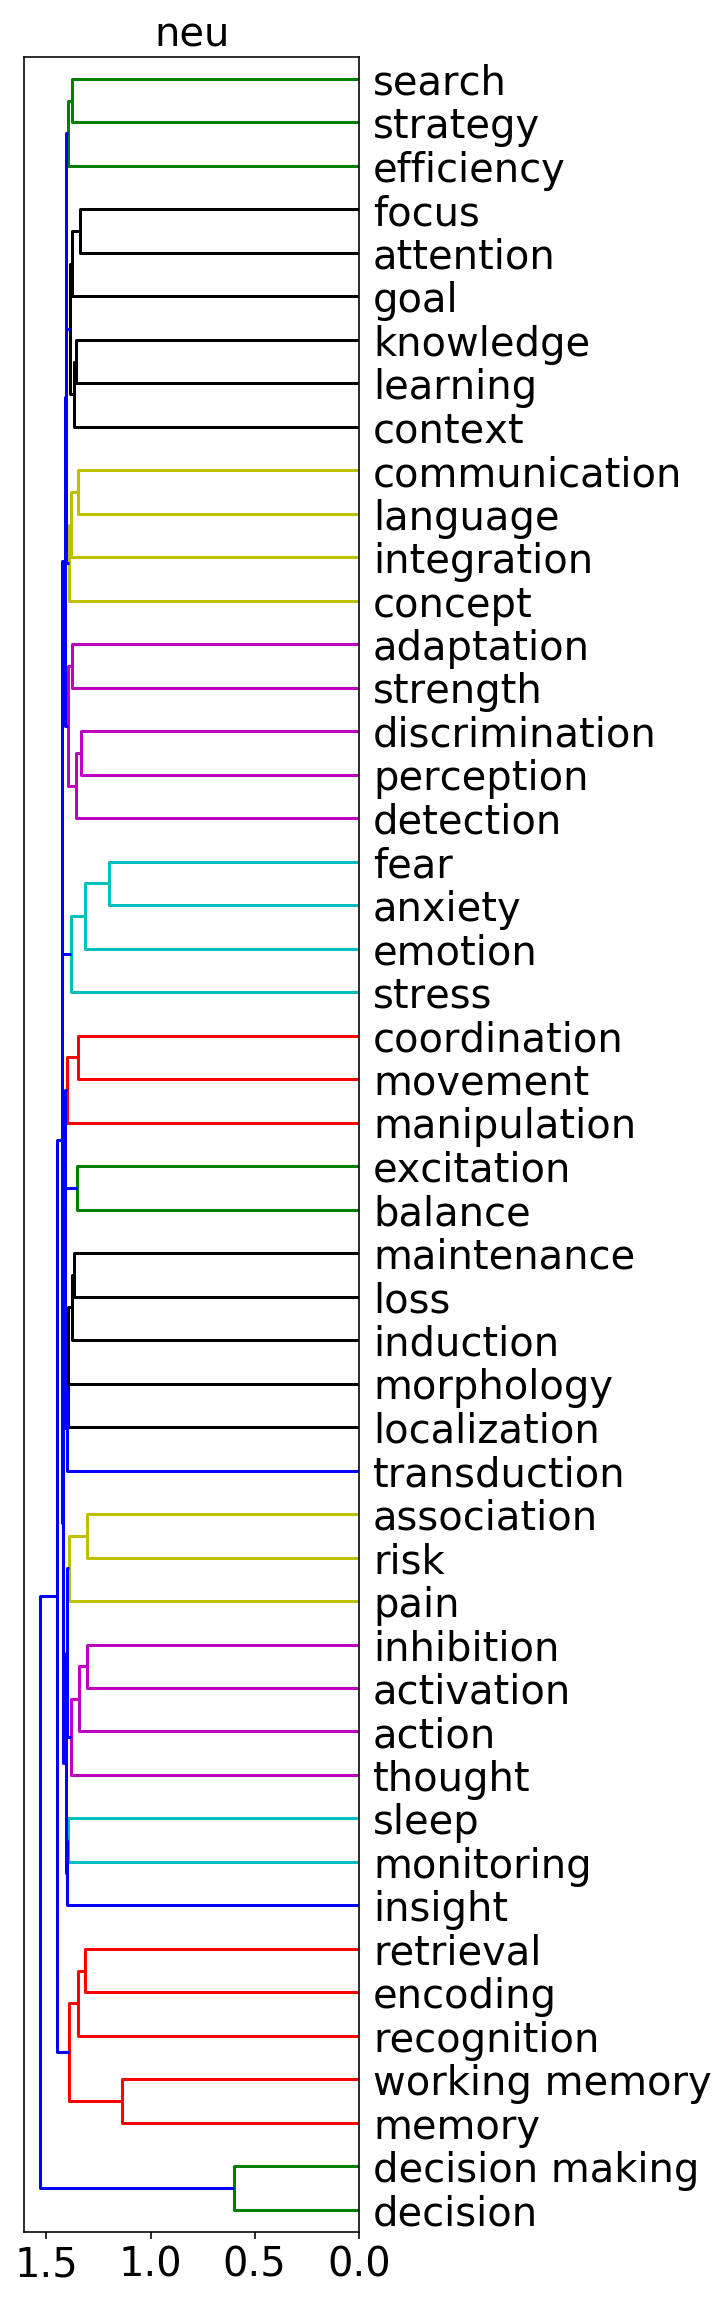

In [297]:
co_count = pd.read_csv('../data/paircount_neu.csv')
counts, terms = sorted_counts(co_count)
top_n = 50
Z = draw_dendrogram(jacard_dist(counts[:top_n, :top_n]), terms[:top_n], 1.4, (3,20));
plt.title('neu', fontsize=20)
plt.xticks(fontsize=20)

1.41701466543


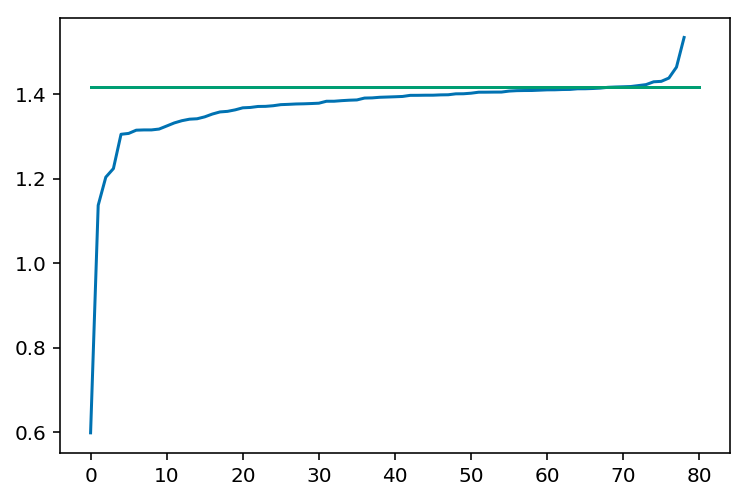

In [291]:
# use this to decide what threshold to use for coloring the clusters
cluster_vals = np.sort([Z['dcoord'][idx][1] for idx in range(len(Z['dcoord']))])
print cluster_vals[-10]
plt.plot(cluster_vals)
plt.plot([0., top_n],2*[cluster_vals[-10]])

### surveying top-related terms in the co-occurrence matrix

In [287]:
query_term = 'fear'
datafiles = ('../data/paircount_cogsci.csv',
             '../data/paircount_cog.csv',
             '../data/paircount_neu.csv', 
             '../data/paircount_neumet.csv')

related_list = []
top_sim = 10
for f in datafiles:
    df = pd.read_csv(f)
    
    # check if query term is in database
    if query_term in list(df):
        # get term-term similarity using Jacard Index    
        similarity = pd.DataFrame(jacard_dist(np.array(df)),columns=list(df))

        # sort term distance based on queried term
        sim_inds = np.argsort(similarity[query_term])[::-1]
        sim = np.sort(similarity[query_term])[::-1]

        # get top-10 words
        related_list.append([list(df)[idx] for idx in sim_inds[:top_sim]])
        related_list.append([round(s,3) for s in sim[:top_sim]])
    else:
        # add blanks for database if term is not in it
        related_list.append(top_sim*[''])
        related_list.append(top_sim*[''])

pd.DataFrame(np.transpose(related_list), columns=('CogSci','', 'PM CS','', 'PM Neu','', 'PM NeuMet',''))

,CogSci,,PM CS,,PM Neu,,PM NeuMet,
0,fear,1.0,fear,1.0,fear,1.0,fear,1.0
1,sadness,0.167,anxiety,0.071,anxiety,0.152,anxiety,0.104
2,happiness,0.1,extinction,0.064,extinction,0.129,extinction,0.088
3,shame,0.083,emotion,0.044,emotion,0.075,emotion,0.076
4,emotion recognition,0.063,sadness,0.038,stress,0.046,happiness,0.07
5,prosody,0.057,pain,0.036,consolidation,0.043,stress,0.033
6,intentionality,0.053,happiness,0.031,learning,0.037,facial expression,0.032
7,facial expression,0.053,stress,0.029,memory,0.036,emotion regulation,0.03
8,stereotypes,0.048,recognition,0.029,arousal,0.032,valence,0.029
9,cueing,0.045,learning,0.028,context,0.029,learning,0.025
